In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [100]:
#load and read data
training_data = pd.read_csv('sample_data/Google_Stock_Price_Train.csv')
training_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [101]:
training_data = training_data.iloc[:, 1].values

In [102]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data.reshape(-1, 1))

x_training_data = []
y_training_data =[]

for i in range(40, len(training_data)):
    x_training_data.append(training_data[i-40:i, 0])
    y_training_data.append(training_data[i, 0])

x_training_data = np.array(x_training_data)
y_training_data = np.array(y_training_data)

print(x_training_data.shape)
print(y_training_data.shape)

(1218, 40)
(1218,)


In [66]:
x_training_data = np.reshape(x_training_data, (x_training_data.shape[0], x_training_data.shape[1], 1))

print(x_training_data.shape)

(1218, 40, 1)


In [75]:
rnn = Sequential()
rnn.add(LSTM(units = 45, return_sequences = True, input_shape = (x_training_data.shape[1], 1)))

In [77]:
rnn.add(LSTM(units = 45, return_sequences = True))
rnn.add(Dropout(0.2))

rnn.add(LSTM(units = 45, return_sequences = True))
rnn.add(Dropout(0.2))

rnn.add(LSTM(units = 45))
rnn.add(Dropout(0.2))

rnn.add(Dense(units = 1))

rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [81]:
rnn.fit(x_training_data, y_training_data, epochs = 100, batch_size = 32)

Epoch 1/100
39/39 [==============================] - 12s 86ms/step - loss: 0.0402
Epoch 2/100
39/39 [==============================] - 3s 87ms/step - loss: 0.0067
Epoch 3/100
39/39 [==============================] - 3s 87ms/step - loss: 0.0069
Epoch 4/100
39/39 [==============================] - 3s 87ms/step - loss: 0.0060
Epoch 5/100
39/39 [==============================] - 3s 87ms/step - loss: 0.0051
Epoch 6/100
39/39 [==============================] - 4s 90ms/step - loss: 0.0050
Epoch 7/100
39/39 [==============================] - 3s 90ms/step - loss: 0.0045
Epoch 8/100
39/39 [==============================] - 3s 88ms/step - loss: 0.0048
Epoch 9/100
39/39 [==============================] - 3s 89ms/step - loss: 0.0047
Epoch 10/100
39/39 [==============================] - 3s 88ms/step - loss: 0.0044
Epoch 11/100
39/39 [==============================] - 3s 87ms/step - loss: 0.0045
Epoch 12/100
39/39 [==============================] - 3s 88ms/step - loss: 0.0037
Epoch 13/100
39/39 [====

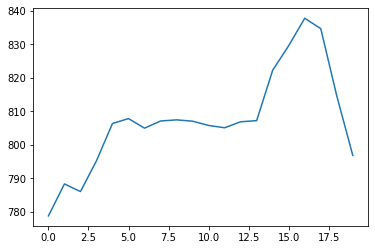

In [83]:
test_data = pd.read_csv('sample_data/Google_Stock_Price_Test.csv')

test_data = test_data.iloc[:, 1].values
plt.plot(test_data)

In [84]:
unscaled_training_data = pd.read_csv('sample_data/Google_Stock_Price_Train.csv')
unscaled_test_data = pd.read_csv('sample_data/Google_Stock_Price_Test.csv')

all_data = pd.concat((unscaled_training_data['Open'], unscaled_test_data['Open']), axis = 0)

x_test_data = all_data[len(all_data) - len(test_data) - 40:].values
x_test_data = np.reshape(x_test_data, (-1, 1))
x_test_data = scaler.transform(x_test_data)

In [90]:
final_x_test_data = []

for i in range(40, len(x_test_data)):
    final_x_test_data.append(x_test_data[i-40:i, 0])

final_x_test_data = np.array(final_x_test_data)
final_x_test_data = np.reshape(final_x_test_data, (final_x_test_data.shape[0], final_x_test_data.shape[1], 1))

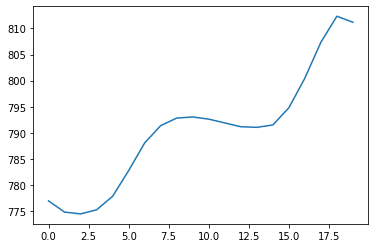

In [93]:
predictions = rnn.predict(final_x_test_data)
unscaled_predictions = scaler.inverse_transform(predictions)
plt.clf()
plt.plot(unscaled_predictions)

Text(0.5, 1.0, 'Google Stock Price Predictions')

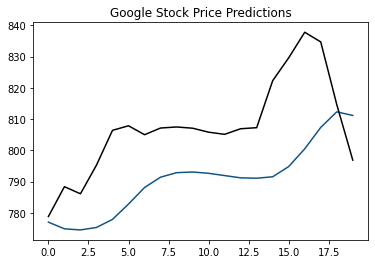

In [95]:
plt.plot(unscaled_predictions, color = '#135485', label = "Predictions")
plt.plot(test_data, color = 'black', label = "Real Data")
plt.title('Google Stock Price Predictions')